# Clase 6 - Algoritmos, eficienica, estabilidad, precisión

## Eficiciencia de los algoritmos

Para cálculos pesados, es necesario estimar la eficiencia del algoritmo. A veces cálculos que parecen inocentes se hacen demasiado pesadoos incluso para un computador.

Para analizar la eficiencia de un algoritmo se estima el número de pasos involucrados. Por ejemplo:

In [1]:
suma = 0
n = 100
for i in range(n):
    suma += i

In [ ]:
suma = sum(range(n))

Este algoritmo toma $n$ pasos, ya que debe realizar $n$ operaciones. Decimos que su eficiencia es de orden $\mathcal{O}(n)$.

A veces es necesario anidar ciclos, esto empieza a aumentar el número de pasos

In [3]:
suma = 0
n = 100
for i in range(n):
    for j in range(i):
        suma += j

Este algoritmo toma mucho más tiempo porque el primer ciclo toma $n$ pasos y el siguiente toma $i$ pasos, Como $i$ puede llegar hasta $n(n-1)/2$ pasos. Cuando $n$ es un número muy grande esto es aproximadamente igual a $n^2/2$. En este caso decimos que la eficiencia del algoritmo es del orden $\mathcal{O}(n^2)$.

A los algoritmos con una eficiencia de orden $\mathcal{O}(n^c)$, donde $c$ es una constante numérica, se los llama algoritmos de eficiencia polinomial.

Los algoritmos más eficientes posibles son los que tienen una eficiencia logarítmica $\mathcal{O}(\log n)$ (y en informática normalmente se usa el logaritmo base $2$ en este contexto. Veremos un ejemplo de uno de estos algoritmos próximamente.

Los peores algoritmos son los que tienen un crecimiento exponencial, por ejemplo $\mathcal{O}(2^n)$, Estos se hacen extremadamente difíciles de ejecutar para un computado incluso para valores modestos de $n$.

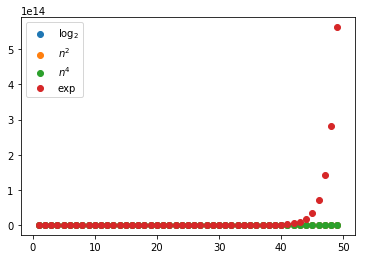

In [149]:
import matplotlib.pyplot as plt
import numpy as np

n = np.arange(1,50)
log = np.log(n)/np.log(2)
pol2 = n**2
pol4 = n**4
exp = 2**n

plt.scatter(n, log, label = '$\log_2$')
plt.scatter(n, pol2, label = '$n^2$')
plt.scatter(n, pol4, label = '$n^4$')
plt.scatter(n, exp, label = 'exp')
plt.legend()

## Precisión y convergencia de los algoritmos

Además de la eficiencia de un algoritmo, también es importante su precisión. Los métodos numéricos consisten en encontrar soluciones aproximadas a los problemas y será importante tener una estimacióon del error cometido. El error cometido en un algoritmo numérico nos da una idea de su precisión. Si el error disminuye a medida que se ejecuta un algoritmo de más pasos, decimos que converge.

El método numérico normalmente consiste en encontrar una sucesión de números que convergen al resultado requerido. Supongamos que tenemos una cierta sucesión $\{\alpha_n\}$ que converge al resultado $\alpha$. Por otra parte supongamos que tenemos otra sucesión $\{\beta_n\}$ que converge a cero. Decimos que el algoritmo converge a $\alpha$ a una razón $\mathcal{O}(\beta_n)$ si se cumple que

$$
|\alpha_n - \alpha| < K|\beta_n|\,,
$$

para alguna constante $K$.

Normalmente se toma $\beta_n = 1/n^c$ para alguna potencia $c$. Los algoritmos que convergen más rápido tienen $c$ alto.

Por ejemplo, consideremos la sucesión $\{n \sin(1/n)\}$, esta converge a $1$ a medida que $n$ crece. Otra sucesión que converge a $1$ es $\{1 - 1/n\}$.

In [14]:
suc1 = []
suc2 = []
for n in range(1,101):
    suc1.append(1 - n*np.sin(1/n))
    suc2.append(1/n)

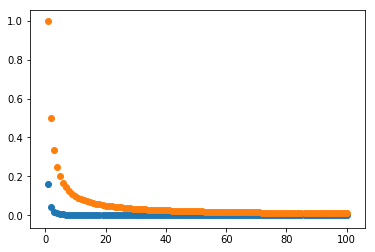

In [16]:
plt.scatter(np.arange(1,101), suc1)
plt.scatter(np.arange(1,101), suc2)

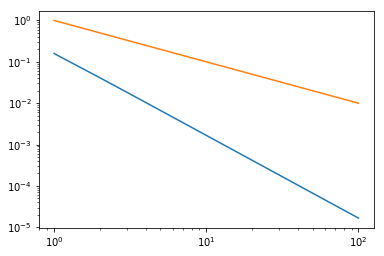

In [17]:
plt.loglog(np.arange(1,101), suc1)
plt.loglog(np.arange(1,101), suc2)

Otro ejemplo es un algoritmo para calcular $\pi$, llamada fórmula de Leibniz

$$
\pi = 4 - \frac{4}{3} + \frac{4}{5} - \frac{4}{7} + \frac{4}{9} - \dots
$$

(Esto viene del hecho que $\pi/4 = \tan^{-1}(1)$ al hacer la expanción de Taylor de la tangente inversa).

Comparada con otra fórmula que converge más rápidamente

$$
\pi = 3 + \frac{4}{2\times 3\times 4} - \frac{4}{4\times 5 \times 6} + \frac{4}{6\times 7\times 8} - \dots
$$

(3.1384510609362035, 3.1447342462433827)

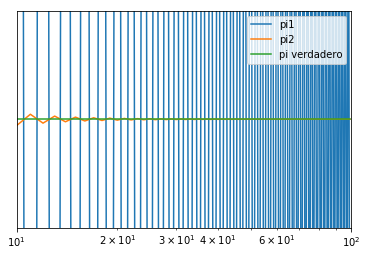

In [34]:
pi1 = [4]
pi2 = [3]

for n in range(1, 100):
    pi1.append(pi1[n-1] + (-1)**n*4/(2*n + 1))
    pi2.append(pi2[n-1] + (-1)**(n + 1)*4/(2*n*(2*n + 1)*2*(n+1)))
    
plt.loglog(np.arange(100), pi1, label='pi1')
plt.loglog(np.arange(100), pi2, label = 'pi2')
plt.loglog(np.arange(100), np.full(100, np.pi), label = 'pi verdadero')
plt.legend()
plt.xlim(10**1, 10**2)
plt.ylim(np.pi - 0.001*np.pi, np.pi + 0.001*np.pi)

## Estabilidad de un algoritmo

Cuando estudiamos los errores de redondeo vimos que cada cálculo introduce un pequeño error. Para hacer cálculos muy precisos necesitamos muchos pasos y el error introducido en cada paso se va acumulando.

Además muchas veces las condiciones y constantes usadas para definir un problema las conocemos con un pequeño error. Por ejemplo el error al medir la posición inicial de una partícula o el error al medir una constante fundamental.

Cuando un algoritmo produce resultados muy diferentes para condiciones muy cercanas, decimos que es **inestable**. En ese caso no poodemos confiar en el algoritmo. Si en cambio produce resultados similares para condiciones similares, decimos que es estable **estable**.

Supongamos que a cada paso introducimos un pequeño error $E_o$ (por ejemplo de redondeo), entonces

* Si al n-ésimo paso tenemos un error $E_n \approx C n E_o$ para alguna constante $C$. Decimos que el error crece de forma lineal (y el algoritmo parece ser estable).

* Si en cambio al n-ésimo paso tenemos un error $E_n \approx C^n E_o$ para alguna constante $C$, decimos que el error crece de forma exponencial (y el algoritmo es inestable).

Para ver un ejemplo, resolvamos la siguiente ecuación diferencial

$$
\frac{d^2}{dx^2}f(x) - m^2 f(x) = 0\,,
$$

La solución general es

$$
f(x) = k_1 e^{mx} + k_2 e^{-mx}\,,
$$

Tomemos $m = 1/3$ y las condiciones de borde $f(0) = 1$ y $f'(0) = -\frac{1}{3}$. Claramente la solución será 

$$
f(x) = e^{-x/3}
$$


Sin embargo si redondeamos las condiciones iniciales a tres cifras decimales, escribiríamos $f(0) = 1$ y $f'(0) = -0.333$. Al hacerlo necesitamos

$$
k_1 + k_2 = 1\,,\quad k_1 - k_2 = 0.999\,,
$$

cuya solución es

$$
k_1 = 1.999/2\,,\quad k_2 = 0.5\times 10^{-3}\,.
$$

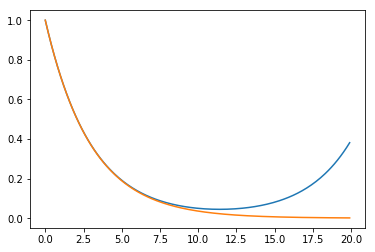

In [70]:
k1_aprox = 1.999/2
k2_aprox = 0.5*10**(-3)
x = np.arange(0,20,0.1)

plt.plot(x, k1_aprox*np.exp(-x/3) + k2_aprox*np.exp(x/3))
plt.plot(x, np.exp(-x/3))

## Tareas

### Tarea 3.6

Ejercicio 1.3.15 del libro de Burden: 

* ¿Cuántas multiplicaciones y sumas es necesario realizar para calcular lo siguiente?

$$
\sum_{i=1}^n \sum_{j = 1}^i a_i b_j
$$

* Reescriba la suma de manera que sea necesario realizar menos operaciones.

* Escriba un código que realice la suma de ambas maneras para $n = 10000$ a partir de arreglos $a_i$ y $b_j$ obtenidos de forma aleatoria usando np.random.rand(10000).

### Tarea 3.7

Ejercicio 1.3.1 del libro de Burden: Use números de punto flotante de 16 bits para calcular las siguientes sumas. Explique por qué ambos métodos en cada caso dan resultados diferentes y cuál es la más correcta.

* $\sum_{n = 1}^{100}\frac{1}{n^2}$ primero de la forma $1 + \frac{1}{4} + \frac{1}{9} + \dots + \frac{1}{10^4}$ y luego en la forma $\frac{1}{10^4} + \dots + \frac{1}{9} + \frac{1}{4} + 1$.

* $\sum_{n = 1}^{100}\frac{1}{n^3}$ primero de la forma $1 + \frac{1}{8} + \frac{1}{27} + \dots + \frac{1}{10^6}$ y luego en la forma $\frac{1}{10^6} + \dots + \frac{1}{27} + \frac{1}{8} + 1$.

### Tarea 3.8

Usando lo que sabe de trigonometría y series de Taylor, escriba otra manera de calcular el número $\pi$. Compare la precisión y convergencia de su expresión con las expresiones dadas en la clase. Ilustre sus conclusiones con gráficos. (Pista: ¿Cuánto es el coseno inverso de 1/2? ¿Cuál es su expansión de Taylor?)

### Tarea 3.9

A partir de los siguientes códigos, explique si el número de pasos es $\mathcal{O}(n^c)$  (y cuánto vale $c$), $\mathcal{O}(\log_2 n)$ o $\mathcal{O}(2^n)$ y por qué. Pista: Para el último código aumente n y vea cómo cambia el número de pasos s. Grafique n contra s e intente deducir a qué corresponde.

In [ ]:
n = 1000
s = 0 
for i in range(n):
    for j in range(n):
        if i < j:
            s = s + i + j

In [ ]:
n = 1000
s = 0
for i in range(n):
    for j in range(i):
        s = s + i + j

Cuidado, consulte en internet lo que hace el enunciado sum() antes de responder

In [ ]:
n = 1000
s = 0
for i in range(n):
    s = s + i + sum(range(n))

In [119]:
n = 100000
small = 0
p = 146
attempt = n//2
not_found = True
s = 0
while not_found:
    s = s + 1
    if attempt > p:
        n = attempt
    elif attempt < p:
        small = attempt
    else:
        print('Encontré', attempt, 'luego de', s, 'pasos')
        break
    attempt = (n + small)//2

Encontré 146 luego de 11 pasos


### Tarea 3.10

Tenemos la siguiente ecuación diferencial

$$
\frac{d}{dx} f(x) = 20 f(x)
$$

y queremos encontrar una $f(x)$ que la cumple y satisface $f(0) = 1$. La respuesta que se obtiene integrando $f(x) = e^{20 x}$ pero imaginemos que no lo sabemos. Una manera aproximada de encontrar $f(1)$ es empezar en $f(0)$ y luego dar un pequeño paso para encontrar $f(\delta x)$ usando

$$
f(\delta x) \approx f(0) + \delta x \frac{d}{dx}f(0) = f(0) + 20\,\delta x f(0)\,.
$$

Luego podemos encontrar $f(2\delta x)$ de manera análoga

$$
f(2\delta x) \approx f(\delta x) + 20\,\delta x f(\delta x)
$$

Si repetimos el proceso $n$ veces tal que $n\,\delta x = 1$, podemos encontrar una solución aproximada para $f(1)$.

Escriba un código que haga lo que acabamos de describir en $n$ pasos. Luego grafique el error relativo de la aproximación en función de $n$ y estime la convergencia de este método. 

Para lograrlo, grafique varias potencias de $n$ en un gráficoo log-log y encuentre cuál tiene una pendiente similar a lo que usted oobtuvo.